# Pandas

- DataFrame 구조
- 데이터 자체를 분석, 파악하기 위해 사용
- 정렬, 필터링, 그룹화, 집계 등 기능 제공

## Pandas의 기능

- 데이터 로딩 및 저장
- 데이터 인덱싱 및 슬라이싱
- 결측치 처리
- 데이터 타입 변환
- 데이터 집계 및 그룹화
- 시계열 데이터 처리
- 데이터 시각화

# Pandas의 데이터 구조

- Series
- DataFrame

## Series

- index를 가진 형태
- dictionary 형태로 key: value 매칭을 통해 index를 지정한 Series 생성 가능
- series.index 형태로 index를 호출할 수 있고, 리스트 형태로 index를 지정해 변경 가능
  ```
  Series를 생성할 때 스칼라를 입력하고, index를 2개 이상 입력하면 index의 크기만큼 스칼라가 복사되고 index를 지정한다</br>
  ```
- Series는 1차원 데이터구조인데 index가 있는 이유는?
  ```
  index가 있으면, computer에 데이터가 저장되어 있을떄 조회하는 속도가 빠르다
  ```

In [1]:
import pandas as pd

In [2]:
series = pd.Series([1, 2, 3, 4])
print(series)
print(type(series))

0    1
1    2
2    3
3    4
dtype: int64
<class 'pandas.core.series.Series'>


### Indexing

In [3]:
series = pd.Series({'a': 1, 'b': 2})
print(series)

a    1
b    2
dtype: int64


In [6]:
series = pd.Series(5, index = [0, 1, 2])
print(series)

0    5
1    5
2    5
dtype: int64


In [7]:
data = [1, 2, 3]
index = ['a', 'b', 'c']

series = pd.Series(data, index = index) # 이렇게 객체를 생성하는 코드를 -> "객체지향적이다" ???
print(series)

a    1
b    2
c    3
dtype: int64


In [8]:
series.index = ['c', 'd', 'e']
print(series)

c    1
d    2
e    3
dtype: int64


### Boolean Indexing

In [31]:
series = pd.Series(np.arange(5))

series[series > 2]

d    3
e    4
dtype: int64

### Slicing

In [42]:
series = pd.Series(np.arange(5))

series[:-1] # series[:4]

0    0
1    1
2    2
3    3
dtype: int64

In [27]:
index = ['a', 'b', 'c', 'd', 'e']

series.index = index

series['a':'c']

a    0
b    1
c    2
dtype: int64

In [29]:
series[::-1]

e    4
d    3
c    2
b    1
a    0
dtype: int64

### 산술연산

Series와 스칼라의 연산은 broadcast 된다

In [34]:
series + 100

a    100
b    101
c    102
d    103
e    104
dtype: int64

In [35]:
series - 100

a   -100
b    -99
c    -98
d    -97
e    -96
dtype: int64

In [36]:
series * 100

a      0
b    100
c    200
d    300
e    400
dtype: int64

In [39]:
series ** 4

a      0
b      1
c     16
d     81
e    256
dtype: int64

In [40]:
series / 4

a    0.00
b    0.25
c    0.50
d    0.75
e    1.00
dtype: float64

### Series객체의 메서드

- keys
- values
- items

```
keys vs keys()

pd.Series.keys와 pd.Series.keys()는 Pandas의 Series 객체에서 사용되는 속성과 메서드이다

pd.Series.keys: keys는 Series 객체의 속성(Attribute)으로, Series의 인덱스를 반환합니다
                이는 Series의 인덱스 정보에 직접 접근하기 위해 사용됩니다. keys 속성은 실제로는 Index 클래스의 인스턴스입니다

pd.Series.keys(): keys()는 Series 객체의 메서드(Method)로, Series의 인덱스를 반환하는 메서드입니다
                  이 메서드는 pd.Index 객체를 반환합니다. keys() 메서드는 pd.Series.index와 동일한 결과를 반환합니다

따라서, pd.Series.keys는 Series 객체의 인덱스를 직접 접근하기 위한 속성이고, pd.Series.keys()는 해당 인덱스를 반환하는 메서드입니다. 이 둘은 서로 유사하게 동작하지만, pd.Series.keys()는 메서드로써 호출되며, 메서드를 통해 인덱스 정보를 얻을 수 있습니다.
```

In [68]:
series.index = ['a','b','c','d','e']

print(f'keys attribute: {series.keys}')
print('-'*50)
print(f'keys method: {series.keys()}')

keys attribute: <bound method Series.keys of a    0
b    1
c    2
d    3
e    4
dtype: int64>
--------------------------------------------------
keys method: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [58]:
pd.Series(series.values, index = series.keys())

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [109]:
print(series.items())
print('-'*30)
print([*series.items()])
print(type([*series.items()]))
print({*series.items()})
print(type({*series.items()}))

------------------------------
[('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4)]
<class 'list'>
{('c', 2), ('a', 0), ('d', 3), ('e', 4), ('b', 1)}
<class 'set'>


In [110]:
for idx, val in series.items():
    print(idx, val)

a 0
b 1
c 2
d 3
e 4


### 조회

#### iloc, loc

iloc: 정수 형태의 위치(position)를 기반으로 데이터 색인
loc: 레이블(label)을 기반으로 데이터 색인

In [131]:
series.iloc[:3]

a    0
b    1
c    2
dtype: int64

In [135]:
series[:3]

a    0
b    1
c    2
dtype: int64

In [144]:
print(series.loc['b'])
print()
print(series.loc[['b', 'c', 'd']])
print()
print(series.loc['b':'d'])

1

b    1
c    2
d    3
dtype: int64

b    1
c    2
d    3
dtype: int64


In [146]:
print(series['b'])
print()
print(series[['b', 'c', 'd']])
print()
print(series['b':'d'])

1

b    1
c    2
d    3
dtype: int64

b    1
c    2
d    3
dtype: int64


In [148]:
print(series.iloc[:3])
print()
print(series.iloc[[0, 1, 2]])
print()
print(series[:3])
print()
print(series[[0, 1, 2]])

a    0
b    1
c    2
dtype: int64

a    0
b    1
c    2
dtype: int64

a    0
b    1
c    2
dtype: int64

a    0
b    1
c    2
dtype: int64


#### at, iat

특정 위치의 값을 인덱싱하거나 변경할 때 사용하는 메서드</br>
loc과 iloc과 비슷한 기능을 하지만, at과 iat은 단일 값에만 적용

- at
- iat

In [129]:
series.iat[1]

1

In [115]:
series.iat[3]         # index location으로 색인

3

In [119]:
print(series.at['f']) # 찾은 Index 값이 없으면 에러 발생

KeyError: 'f'

In [118]:
print(series.get('f')) # 찾는 Index 값이 없으면 None 반환

None


In [125]:
print(series.get(['a', 'b', 'c'])) # 리스트 자료형으로 찾고 싶은 Index를 묶어서 인자에 전달하면 여러 값 호출 가능

a    0
b    1
c    2
dtype: int64


In [123]:
print(series.get(['a', 'g'])) # 단, 일치하지 않는 Index가 있으면 None

None


In [138]:
print(series.get(['g'], default = -1)) # 일치하는 Index가 없을때, 반환값 지정

-1


## 결측값 (NaN, None)

NaN(Not a Number) vs None

NaN: float type
None: None type

In [152]:
lst = [1, 2, 3, None]

In [157]:
# Numpy와 Pandas에서 None을 다르게 처리한다

arr_none = np.array(lst)
series_none = pd.Series(lst)
print(arr_none)
print()
print(series_none) # NaN은 float type이기 때문에 에러 발생이 적어진다

[1 2 3 None]

0    1.0
1    2.0
2    3.0
3    NaN
dtype: float64


### 결측치 확인 메서드

- isna()
- isnull()
- notna()
- notnull()

In [165]:
print(series_none.isna())
print()
print(series_none.isnull())

0    False
1    False
2    False
3     True
dtype: bool

0    False
1    False
2    False
3     True
dtype: bool


In [173]:
print(series_none.isna().sum())
print(series_none.notna().sum())
print(series_none.isnull().sum())
print(series_none.notnull().sum())

1
3
1
3


### 결측치 처리 메서드

- 결측치 제거: dropna
- 결측치 대치: fillna

In [174]:
print(series_none.dropna())

0    1.0
1    2.0
2    3.0
dtype: float64


In [175]:
print(series_none.fillna(0))

0    1.0
1    2.0
2    3.0
3    0.0
dtype: float64


## Series 메서드

set_value
reset_index
reindex
.rename(lambda x: x.lower()) - 인덱스를 변경하는데 값이 변경되는 현상-> 왜인지 모르겠고
                                lambda를 적용해서 소문자 or 대문자로 변경하는 등 작업이 가능하다
drop_duplecates: 중복값 제거
duplicated: 중복여부 boolean return
(String Operations) str

### element-wise

In [176]:
# 결측치를 제외한 요소 count
series_none.count()

3

In [177]:
len(series_none)

4

In [387]:
series_none.value_counts()

1.0    1
2.0    1
3.0    1
Name: count, dtype: int64

In [ ]:
String Operations


### aggregate

In [182]:
series.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, a to e
Series name: None
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 252.0+ bytes


In [179]:
print(series.mean())
print(series.min())
print(series.max())
print(series.median())

2.0
0
4
2.0


In [181]:
# 기초 통계 내용 출력

series.describe()

count    5.000000
mean     2.000000
std      1.581139
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000
dtype: float64

## DataFrame - [pivot 정리](https://wikidocs.net/154073)

- DataFrame( ): DataFrame create
    - data:
    - index:
    - columns:
    - dtype:

- read_csv( ): DataFrame load
    - data: path of data
    - index: 
    - dtype: 
    - sep: 파일 형식에 따른 구분자 지정
    - header: column names 지정 (default: infer / None / 0: 첫 row를 header로 지정)
    - index_col: column을 index로 지정
    - encoding: (utf-8, cp949, euc-kr)
    - skiprows
    - skipfooter

### DataFrame 생성

In [283]:
df = pd.DataFrame({
    '연차': [1, 2, 3],
    '연도': [2015, 2016, 2017],
    '매출': [10000, 20000, 30000]
})

df.head()

,연차,연도,매출
0,1,2015,10000
1,2,2016,20000
2,3,2017,30000


In [186]:
print(f'index: {df.index}')
print()
print(f'columns: {df.columns}')

index: RangeIndex(start=0, stop=3, step=1)

columns: Index(['연차', '연도', '매출'], dtype='object')


Index를 잘 지정하면, 조회한 column에 대한 데이터를 이해하기 쉽다

In [192]:
# column을 index 설정

df.set_index('연도', inplace = True)
df.head()

,연차,매출
연도,,
2015,1,10000
2016,2,20000
2017,3,30000


In [193]:
df['매출']

연도
2015    10000
2016    20000
2017    30000
Name: 매출, dtype: int64

In [191]:
# index를 column으로 추출
# reset_index - drop / inplace

df.reset_index(inplace = True)
df.head()

,연도,연차,매출
0,2015,1,10000
1,2016,2,20000
2,2017,3,30000


### csv data load

In [209]:
import os

In [236]:
data_path = os.path.join(os.getcwd(), '..', 'source/sample_data')
print(data_path)

/Users/thkim/Documents/likelion/study_notes/../source/sample_data


In [311]:
df_house = pd.read_csv(os.path.join(data_path, 'california_housing_test.csv'))
df_house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


### Excel Data Load

- read_excel( )
    - data
    - sheet_name: str or list / None - 모든 sheet

In [431]:
df_excel = pd.read_excel(os.path.join(data_path, 'rawData_sheetplus.xlsx'))
df_excel.head()

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320


In [434]:
df_excel_sheets = pd.read_excel(os.path.join(data_path, 'rawData_sheetplus.xlsx'), sheet_name = [0, 'Sheet2'])
df_excel_sheets

{0:    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

In [435]:
df_excel_sheets[0].head()

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320


In [437]:
# sheet_name parameter를 이용하면 sheet name을 설정할 수 있다
df_excel_sheets['Sheet2'].to_excel(os.path.join(data_path, 'test_excel.xlsx'), sheet_name = 'first')

### txt data load

In [439]:
txt = pd.read_table(os.path.join(data_path, 'raw.txt'))
txt.head()

,연차
0,연도
1,매출
2,순익
3,직원수
4,2


### DataFrame 정보 조회

- head(n), tail(n)
  - 상위 or 하위 n개 row 데이터 출력
  - default n: 5
- describe( ): 기초 통계정보 출력
- index: DataFrame의 index 반환
- shape: Return a tuple representing the dimensionality of the DataFrame
- info( ): This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
- value_counts( ): 

In [215]:
df_house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [218]:
df_house.index

RangeIndex(start=0, stop=3000, step=1)

In [217]:
df_house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [214]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [212]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [213]:
df_house.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

### 데이터 조회

- loc
- iloc

속도 측면에서, 단순히 한개의 값만 인덱싱 할 때는 loc, iloc 보다 at, iat을 사용하는 것이 효율적이다</br>
다중 column, row를 인덱싱할 때는 iloc, loc가 []를 이용한 슬라이싱보다 효율적이다

[loc, iloc, at, iat 속도 비교](https://devocean.sk.com/blog/techBoardDetail.do?ID=164657&boardType=techBlog)

In [199]:
df.loc[2016] # 행 - 레이블로 가져옴

연차        2
매출    20000
Name: 2016, dtype: int64

In [202]:
df.loc[2016:2017] # df.loc[[2016, 2017]]

,연차,매출
연도,,
2016,2,20000
2017,3,30000


In [203]:
df.iloc[1]

연차        2
매출    20000
Name: 2016, dtype: int64

In [205]:
df.iloc[1:3]

,연차,매출
연도,,
2016,2,20000
2017,3,30000


### 데이터 형변환

- astype
  - 데이터 타입이 변경된 DataFrame or Series를 반환하고, 원본에 변경사항을 적용하지 않는다

In [219]:
df_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

- 데이터 타입 변환 가능 columns
  - households, population, housing_median_age, total_rooms, total_bedrooms, median_house_value
- 데이터 형변환 후 통계 함수 적용

In [312]:
integer_columns = ['households', 'population', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value']
df_house[integer_columns] = df_house[integer_columns].astype(int)

In [440]:
df_house.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms          int64
population              int64
households              int64
median_income         float64
median_house_value      int64
dtype: object

In [249]:
# df_house = df_house.astype({
#                         'households': 'int',
#                         'population': 'int',
#                         'housing_median_age': 'int',
#                         'total_rooms': 'int',
#                         'total_bedrooms': 'int',
#                         'median_house_value': 'int'
#                         })

In [443]:
df = pd.DataFrame({
    '연차': [1, 2, 3],
    '연도': [2015, 2016, 2017],
    '매출': [10000, 20000, 30000]
})

In [444]:
df['Date_str'] = ['2023-01-01 11:25:00',
                  '2023-01-02 11:25:00',
                  '2023-01-03 11:25:00']
df.head()

,연차,연도,매출,Date_str
0,1,2015,10000,2023-01-01 11:25:00
1,2,2016,20000,2023-01-02 11:25:00
2,3,2017,30000,2023-01-03 11:25:00


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연차        3 non-null      int64 
 1   연도        3 non-null      int64 
 2   매출        3 non-null      int64 
 3   Date_str  3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [324]:
df['Date'] = pd.to_datetime(df['Date_str'], format = '%Y-%m-%d %H:%M:%S')
df.head()

,연차,연도,매출,Date_str,Date
0,1,2015,10000,2023-01-01 11:25:00,2023-01-01 11:25:00
1,2,2016,20000,2023-01-02 11:25:00,2023-01-02 11:25:00
2,3,2017,30000,2023-01-03 11:25:00,2023-01-03 11:25:00


In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   연차        3 non-null      int64         
 1   연도        3 non-null      int64         
 2   매출        3 non-null      int64         
 3   Date_str  3 non-null      object        
 4   Date      3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 248.0+ bytes


In [296]:
df['Date'].dt.date # year, month, day, time, hour, minute, second

0    2023-01-01
1    2023-01-02
2    2023-01-03
Name: Date, dtype: object

## DataFrame 메서드

In [442]:
# array형태로 column의 unique values반환

df_house['total_rooms'].unique()

array([3885, 1510, 3589, ..., 4867,  573, 5257])

In [264]:
# columns의 unique 값의 수

df_house['total_rooms'].nunique()

2215

In [263]:
# unique 값 별 빈도수

df_house['total_rooms'].value_counts()

total_rooms
907     5
1787    5
1778    5
1966    5
1499    4
       ..
1132    1
3199    1
1433    1
4602    1
5257    1
Name: count, Length: 2215, dtype: int64

## 산술연산

In [447]:
df_house['total_rooms'].agg(['mean', 'min', 'max', 'sum', 'count', 'median', 'std', 'var'])

mean      2.599579e+03
min       6.000000e+00
max       3.045000e+04
sum       7.798736e+06
count     3.000000e+03
median    2.106000e+03
std       2.155593e+03
var       4.646583e+06
Name: total_rooms, dtype: float64

## groupby

- 데이터를 그룹별로 분할 -> 함수 적용 -> 결합

In [276]:
df_house.groupby('total_rooms').mean()

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,median_house_value
total_rooms,,,,,,,,
6,-116.95,33.86,1.0,2.0,8.0,2.0,1.6250,55000.0
16,-117.12,32.66,52.0,4.0,8.0,3.0,1.1250,60000.0
18,-114.62,33.62,26.0,3.0,5.0,3.0,0.5360,275000.0
19,-121.04,37.67,16.0,19.0,166.0,9.0,0.5360,162500.0
21,-118.06,34.03,36.0,7.0,21.0,9.0,2.3750,175000.0
...,...,...,...,...,...,...,...,...
21988,-117.12,33.49,4.0,4055.0,8824.0,3252.0,3.9963,191100.0
23915,-117.27,33.15,4.0,4135.0,10877.0,3958.0,4.6357,244900.0
24121,-116.36,33.78,6.0,4522.0,4176.0,2221.0,3.3799,239300.0


In [280]:
df_house.groupby('total_rooms')['total_bedrooms'].mean()

total_rooms
6           2.0
16          4.0
18          3.0
19         19.0
21          7.0
          ...  
21988    4055.0
23915    4135.0
24121    4522.0
27870    5027.0
30450    5033.0
Name: total_bedrooms, Length: 2215, dtype: float64

In [305]:
df_2 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울', '제주', '제주', '부산', '부산', '제주'],
    '연도': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    '전입신고 수': [10040, 22300, 6000, 12400, 4000, 600, 11100, 45000, 31000],
    '세금': [1004000, 2230000, 600000, 1240000, 400000, 60000, 1110000, 4500000, 3100000]
})
df_2.head()

,도시,연도,전입신고 수,세금
0,서울,2015,10040,1004000
1,부산,2016,22300,2230000
2,제주,2017,6000,600000
3,서울,2018,12400,1240000
4,제주,2019,4000,400000


In [307]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도시      9 non-null      object
 1   연도      9 non-null      int64 
 2   전입신고 수  9 non-null      int64 
 3   세금      9 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [308]:
df_2.groupby('도시')['전입신고 수'].sum()

도시
부산    78400
서울    22440
제주    41600
Name: 전입신고 수, dtype: int64

In [309]:
df_2.groupby('도시')['전입신고 수'].agg(['mean', 'min', 'max', 'sum'])

,mean,min,max,sum
도시,,,,
부산,26133.333333,11100,45000,78400
서울,11220.000000,10040,12400,22440
제주,10400.000000,600,31000,41600


### 데이터프레임 병합 - 다시 정리

\[concat\]</br>
Concat function concatenates dataframes along rows or columns</br>
stacking up multiple dataframes
```python
pd.concat([DataFrames], axis, ignore_index, join)
```
  - ignore_index: index 재배열 (default = False)
  - axis: concat의 axis 기준 (0, 1) 지정
  - join: inner or outer(default)

axis 0
if column name is different

if index label is different

axis 1
if index label is different

if column name is different

\[merge\]</br>
Merge combines dataframes based on values in shared columns</br>
Merge function offers more flexibility compared to concat function because it allows combinations based on a condition
```python
pd.merge(left, right, how, on, sort ...)
```
- left: merge의 기준 DataFrame
- right: left에 merge할 DataFrame
- how: inner(default), outer, left, right
- on: DataFrame을 merge하는 기준 column
  - on을 설정하지 않아도, default로 지정될 공통된 column name이 없으면 에러 발생

concat은 join을 했을 때, column명이 같고, index가 다르면 

In [373]:
data = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 2020],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]
    }, index=['a', 'b', 'c', 'd']
)

data2 = pd.DataFrame({
    '도시': ['서울', '부산', '제주', '서울'],
    '연도': [2015, 2015, 2011, 20203],
    '전입신고 수': [10040, 22300, 6000, 12400],
    '세금': [1004000, 2230000, 600000, 1240000]},
    index=['e', 'f', 'g', 'h']
    )

In [331]:
data.head()

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000


In [332]:
data2.head()

,도시,연도,전입신고 수,세금
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,20203,12400,1240000


In [333]:
pd.concat([data, data2])

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,20203,12400,1240000


In [374]:
pd.concat([data, data2], axis = 1)

,도시,연도,전입신고 수,세금,도시,연도,전입신고 수,세금
a,서울,2015.0,10040.0,1004000.0,NaN,NaN,NaN,NaN
b,부산,2015.0,22300.0,2230000.0,NaN,NaN,NaN,NaN
c,제주,2011.0,6000.0,600000.0,NaN,NaN,NaN,NaN
d,서울,2020.0,12400.0,1240000.0,NaN,NaN,NaN,NaN
e,NaN,NaN,NaN,NaN,서울,2015.0,10040.0,1004000.0
f,NaN,NaN,NaN,NaN,부산,2015.0,22300.0,2230000.0
g,NaN,NaN,NaN,NaN,제주,2011.0,6000.0,600000.0
h,NaN,NaN,NaN,NaN,서울,20203.0,12400.0,1240000.0


In [370]:
data2.index = data.index
data2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [371]:
pd.concat([data, data2])

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,20203,12400,1240000


In [372]:
pd.concat([data, data2], axis = 1)

,도시,연도,전입신고 수,세금,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000,서울,2015,10040,1004000
b,부산,2015,22300,2230000,부산,2015,22300,2230000
c,제주,2011,6000,600000,제주,2011,6000,600000
d,서울,2020,12400,1240000,서울,20203,12400,1240000


In [379]:
pd.concat([data, data2], join = 'inner')

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,20203,12400,1240000


In [380]:
data

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000


In [381]:
data2

,도시,연도,전입신고 수,세금
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,20203,12400,1240000


In [385]:
data2['junk'] = [1, 2, 3, 4]
data2

,도시,연도,전입신고 수,세금,junk
e,서울,2015,10040,1004000,1
f,부산,2015,22300,2230000,2
g,제주,2011,6000,600000,3
h,서울,20203,12400,1240000,4


In [382]:
pd.concat([data, data2], join = 'inner')

,도시,연도,전입신고 수,세금
a,서울,2015,10040,1004000
b,부산,2015,22300,2230000
c,제주,2011,6000,600000
d,서울,2020,12400,1240000
e,서울,2015,10040,1004000
f,부산,2015,22300,2230000
g,제주,2011,6000,600000
h,서울,20203,12400,1240000


In [386]:
pd.merge(data, data2, how = 'left', on = ['도시', '연도', '전입신고 수', '세금'])

,도시,연도,전입신고 수,세금,junk
0,서울,2015,10040,1004000,1.0
1,부산,2015,22300,2230000,2.0
2,제주,2011,6000,600000,3.0
3,서울,2020,12400,1240000,NaN


In [339]:
df1 = pd.DataFrame([['A0', 'A1', 'A2', 'A3'],
                     ['B0', 'B1', 'B2', 'B3'],
                     ['C0', 'C1', 'C2', 'C3'],
                     ['D0', 'D1', 'D2', 'D3']],
                    columns=list('ABCD'))
 
df2 = pd.DataFrame([['A4', 'A5', 'A6', 'A7'],
                     ['B4', 'B5', 'B6', 'B7'],
                     ['C4', 'C5', 'C6', 'C7'],
                     ['D4', 'D5', 'D6', 'D7']],
                   columns=['A', 'B', 'C', 'D'],
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame([['A8', 'A9', 'A10', 'A11'],
                     ['B8', 'B9', 'B10', 'B11'],
                     ['C8', 'C9', 'C10', 'C11'],
                     ['D8', 'D9', 'D10', 'D11']],
                    columns=list('ABCD'),
                    index=[8, 9, 10, 11])

df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']}, index=[2, 3, 6, 7])

In [341]:
df1

,A,B,C,D
0,A0,A1,A2,A3
1,B0,B1,B2,B3
2,C0,C1,C2,C3
3,D0,D1,D2,D3


In [342]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [348]:
pd.concat([df1, df4])

,A,B,C,D,F
0,A0,A1,A2,A3,NaN
1,B0,B1,B2,B3,NaN
2,C0,C1,C2,C3,NaN
3,D0,D1,D2,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [375]:
pd.concat([df1, df4], axis = 1)

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [340]:
# axis 0 에서 column name이 같은 column에 대한 concat 결과 출력
pd.concat([df1, df4], join = 'inner') # Based on same column names

,B,D
0,A1,A3
1,B1,B3
2,C1,C3
3,D1,D3
2,B2,D2
3,B3,D3
6,B6,D6
7,B7,D7


In [343]:
pd.concat([df1, df4], axis = 1, join = 'inner') # Index label

,A,B,C,D,B,D,F
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [344]:
pd.concat([df1, df4], axis = 1).reindex(df1.index) # left join

,A,B,C,D,B,D,F
0,A0,A1,A2,A3,NaN,NaN,NaN
1,B0,B1,B2,B3,NaN,NaN,NaN
2,C0,C1,C2,C3,B2,D2,F2
3,D0,D1,D2,D3,B3,D3,F3


In [403]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A4', 'A2', 'A3'],
                     'B': ['B0', 'B4', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [399]:
pd.merge(left, right)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [409]:
pd.concat([left, right], axis = 1, join = 'inner')

,key,A,B,key,C,D
0,K0,A0,B0,K0,C0,D0
1,K4,A4,B4,K1,C1,D1
2,K2,A2,B2,K2,C2,D2
3,K3,A3,B3,K3,C3,D3


In [395]:
pd.merge(left, right, how = 'outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [402]:
right.columns = ['key', 'A', 'D']

In [401]:
pd.merge(left, right, on = 'key')

,key,A_x,B,A_y,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [404]:
pd.merge(left, right, on = 'key', how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A4,B4,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [405]:
pd.merge(left, right, on = 'key', how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


## 반정형 데이터 로드
- json, html, xml 등 서버에서 주고받는 데이터
- 센서 등</br>
정형 형태를 띄지만, 해석하기 어려운 형태의 데이터

In [449]:
shop = pd.read_json(os.path.join(data_path, 'data.json'))
shop.head()

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28


In [451]:
pd.read_json('https://test.api.weniv.co.kr/mall')

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


In [457]:
pd.read_xml(os.path.join(data_path, 'raw_data.xml'))

,category,id,year,sales,profit,employees
0,develop,2,2020,4000000,1400000,40
1,develop,4,2018,3700000,1370000,38
2,develop,6,2016,5300000,2000000,52
3,accounting,8,2014,7000000,2400000,100
4,accounting,10,2012,8000000,3000000,320
5,accounting,5,2017,4600000,1870000,41


# 이미지

이미지 인식 - Pillow</br>
이미지 출력 - Matplotlib

In [459]:
from PIL import Image
import matplotlib.pyplot as plt

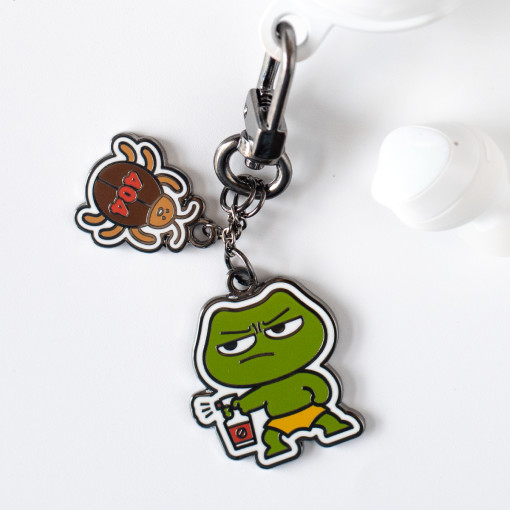

In [470]:
gary = Image.open(os.path.join(data_path, 'thumbnailImg.PNG'))
gary

In [462]:
pixel = np.array(gary)
pixel.shape

(510, 510, 3)

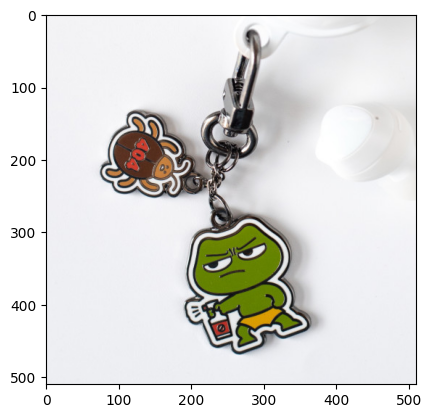

In [463]:
plt.imshow(gary)

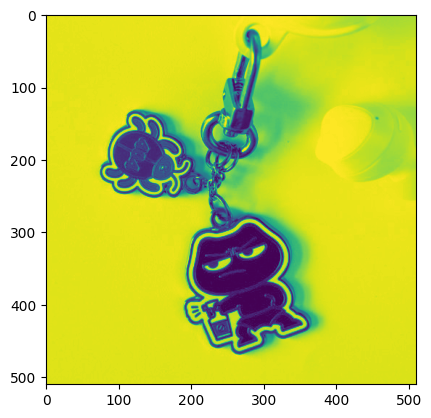

In [486]:
plt.imshow(pixel[:, :, 2])

---

pd.where

- 데이터 컬럼(시리즈)에 대해서 특정 조건을 만족하지 않는 값을 대치하고 싶을때 사용
```python
df.where(시리즈에 대한 조건, 조건을 만족하지 않는 값에 대한 대체값)
```

np.where(조건, 참일때 반환값, 거짓일때 반환값)